In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder, LabelEncoder
import numpy as np
import seaborn as sns
import operator


%matplotlib inline

/home/maxime/local/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [55]:
df = pd.read_csv('data/train.csv',sep=';')
df.head()

,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,...,oecd_NB_BACKWARD_NPL,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,PRIORITY_MONTH,FILING_MONTH,PUBLICATION_MONTH,BEGIN_MONTH
0,EURO-PCT,US,D0,1,1,1,US,COMPAGNY,en,A61K9/48,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,09/1995,08/1996,03/1997,09/1995
1,EURO-PCT,DE,D0,1,1,1,DE,COMPAGNY,de,C08G65/26,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,11/1999,11/2000,05/2001,11/1999
2,VOIE DIRECTE,JP,D0,1,1,1,JP,COMPAGNY,en,G11B15/07,...,0.125,0.897778,CALC,1.00,IMPUT,GRANTED,06/1992,05/1993,12/1993,06/1992
3,VOIE DIRECTE,GB,D0,1,1,1,GB,COMPAGNY,en,F25B41/04,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,05/1994,05/1995,11/1995,05/1994
4,VOIE DIRECTE,DE,D0,1,1,1,DE,COMPAGNY,de,H01F17/06,...,0.000,0.625000,CALC,0.25,CALC,GRANTED,12/1988,11/1989,06/1990,12/1988


In [56]:
print(len(df))

259431


#
# ------------ Preprocessings -------------------------------------------------------------
#

In [57]:
df.PRIORITY_MONTH = pd.to_datetime(df.PRIORITY_MONTH, format='%m/%Y')
df.FILING_MONTH = pd.to_datetime(df.FILING_MONTH, format='%m/%Y')
df.PUBLICATION_MONTH = pd.to_datetime(df.PUBLICATION_MONTH, format='%m/%Y')
df.BEGIN_MONTH = pd.to_datetime(df.BEGIN_MONTH, format='%m/%Y')

In [58]:
df.head()

,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,...,oecd_NB_BACKWARD_NPL,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,PRIORITY_MONTH,FILING_MONTH,PUBLICATION_MONTH,BEGIN_MONTH
0,EURO-PCT,US,D0,1,1,1,US,COMPAGNY,en,A61K9/48,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,1995-09-01,1996-08-01,1997-03-01,1995-09-01
1,EURO-PCT,DE,D0,1,1,1,DE,COMPAGNY,de,C08G65/26,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,1999-11-01,2000-11-01,2001-05-01,1999-11-01
2,VOIE DIRECTE,JP,D0,1,1,1,JP,COMPAGNY,en,G11B15/07,...,0.125,0.897778,CALC,1.00,IMPUT,GRANTED,1992-06-01,1993-05-01,1993-12-01,1992-06-01
3,VOIE DIRECTE,GB,D0,1,1,1,GB,COMPAGNY,en,F25B41/04,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,1994-05-01,1995-05-01,1995-11-01,1994-05-01
4,VOIE DIRECTE,DE,D0,1,1,1,DE,COMPAGNY,de,H01F17/06,...,0.000,0.625000,CALC,0.25,CALC,GRANTED,1988-12-01,1989-11-01,1990-06-01,1988-12-01


In [59]:
df['diff'] = df.BEGIN_MONTH - df.PRIORITY_MONTH

In [60]:
df[df['diff'].dt.days!=0]

,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,...,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,PRIORITY_MONTH,FILING_MONTH,PUBLICATION_MONTH,BEGIN_MONTH,diff
10,VOIE DIRECTE,NaN,D1,1,1,1,CH,COMPAGNY,de,G06F17/60,...,1.000000,IMPUT,1.000000,IMPUT,NOT GRANTED,NaT,2003-03-01,2004-09-01,2003-03-01,NaT
25,VOIE DIRECTE,NaN,D1,1,1,1,CH,COMPAGNY,de,A61M1/00,...,0.000000,CALC,1.000000,IMPUT,GRANTED,NaT,1997-02-01,2005-05-01,1997-02-01,NaT
33,VOIE DIRECTE,NaN,D1,1,1,1,US,COMPAGNY,en,H04Q7/38,...,0.593750,CALC,0.625000,CALC,NOT GRANTED,NaT,2000-05-01,2001-11-01,2000-05-01,NaT
37,VOIE DIRECTE,NaN,D1,2,1,0,DE,(MISSING),de,B01J20/34,...,0.750000,CALC,0.750000,CALC,NOT GRANTED,NaT,1990-05-01,1991-12-01,1990-05-01,NaT
38,VOIE DIRECTE,NaN,D1,1,1,1,CH,COMPAGNY,de,F01D11/08,...,1.000000,IMPUT,1.000000,IMPUT,GRANTED,NaT,1998-11-01,2000-05-01,1998-11-01,NaT
42,VOIE DIRECTE,NaN,D1,1,1,1,CA,UNIVERSITY,en,H04M1/725,...,1.000000,IMPUT,1.000000,IMPUT,GRANTED,NaT,2005-02-01,2006-08-01,2005-02-01,NaT
64,VOIE DIRECTE,NaN,D1,1,1,1,DE,COMPAGNY,de,E01C19/48,...,0.000000,CALC,1.000000,IMPUT,GRANTED,NaT,1996-11-01,1998-05-01,1996-11-01,NaT
75,VOIE DIRECTE,NaN,D1,1,1,1,LI,COMPAGNY,de,B65D19/40,...,0.000000,CALC,1.000000,IMPUT,GRANTED,NaT,2004-04-01,2005-10-01,2004-04-01,NaT
103,VOIE DIRECTE,NaN,D1,1,1,1,DE,COMPAGNY,de,B65D81/00,...,0.666667,CALC,1.000000,IMPUT,GRANTED,NaT,1998-05-01,1999-12-01,1998-05-01,NaT
140,VOIE DIRECTE,NaN,D1,1,1,1,IT,COMPAGNY,it,H03G7/00,...,1.000000,IMPUT,1.000000,IMPUT,NOT GRANTED,NaT,1993-02-01,1994-08-01,1993-02-01,NaT


PRIORITY_MONTH est toujours égale à BEGIN_MONTH sauf quand PRIORITY_MONTH = NaN.

==> Enlever PRIORITY_MONTH

In [61]:
df = df.drop(['PRIORITY_MONTH', 'diff'], axis=1)

df['filing-begin'] = (df.FILING_MONTH - df.BEGIN_MONTH).dt.days
df['pub-filing'] = (df.PUBLICATION_MONTH - df.FILING_MONTH).dt.days
df['pub_year'] = df.PUBLICATION_MONTH.dt.year

df = df.drop(['FILING_MONTH', 'PUBLICATION_MONTH','BEGIN_MONTH'], axis=1)

df.head()

,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,...,oecd_NB_BACKWARD_PL,oecd_NB_BACKWARD_NPL,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,filing-begin,pub-filing,pub_year
0,EURO-PCT,US,D0,1,1,1,US,COMPAGNY,en,A61K9/48,...,0.000000,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,335,212,1997
1,EURO-PCT,DE,D0,1,1,1,DE,COMPAGNY,de,C08G65/26,...,0.000000,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,366,181,2001
2,VOIE DIRECTE,JP,D0,1,1,1,JP,COMPAGNY,en,G11B15/07,...,0.785714,0.125,0.897778,CALC,1.00,IMPUT,GRANTED,334,214,1993
3,VOIE DIRECTE,GB,D0,1,1,1,GB,COMPAGNY,en,F25B41/04,...,0.230769,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,365,184,1995
4,VOIE DIRECTE,DE,D0,1,1,1,DE,COMPAGNY,de,H01F17/06,...,0.500000,0.000,0.625000,CALC,0.25,CALC,GRANTED,335,212,1990


In [62]:
# converting categorical data into numerical codes :
#
# NaN's will be replaced by -1

cat_columns = df.select_dtypes(['object']).columns
print(cat_columns)

for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

Index(['VOIE_DEPOT', 'COUNTRY', 'SOURCE_BEGIN_MONTH', 'FISRT_APP_COUNTRY',
       'FISRT_APP_TYPE', 'LANGUAGE_OF_FILLING', 'FIRST_CLASSE',
       'TECHNOLOGIE_SECTOR', 'TECHNOLOGIE_FIELD', 'MAIN_IPC',
       'FISRT_INV_COUNTRY', 'FISRT_INV_TYPE', 'SOURCE_CITED_AGE',
       'SOURCE_IDX_ORI', 'SOURCE_IDX_RAD', 'VARIABLE_CIBLE'],
      dtype='object')


,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,...,oecd_NB_BACKWARD_PL,oecd_NB_BACKWARD_NPL,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,filing-begin,pub-filing,pub_year
0,0,82,0,1,1,1,115,1,6,3854,...,0.000000,0.000,1.000000,1,1.00,1,0,335,212,1997
1,0,19,0,1,1,1,32,1,4,17718,...,0.000000,0.000,1.000000,1,1.00,1,0,366,181,2001
2,1,45,0,1,1,1,59,1,6,31427,...,0.785714,0.125,0.897778,0,1.00,1,0,334,214,1993
3,1,29,0,1,1,1,42,1,6,26954,...,0.230769,0.000,1.000000,1,1.00,1,0,365,184,1995
4,1,19,0,1,1,1,32,1,4,32145,...,0.500000,0.000,0.625000,0,0.25,0,0,335,212,1990


In [63]:
def unique(df):
    for col in df.columns:
        l = len(df[col].unique())
        
        print(col+' : ', l)
        print(df[col].unique())
        print('-----------------------------------------------------')

In [64]:
unique(df)

VOIE_DEPOT :  2
[0 1]
-----------------------------------------------------
COUNTRY :  91
[82 19 45 29 70 -1 43 28 25 61 60 47 11 26 86 87 13 18 20  3 51 27 42 10 62
  4 39 71  2 69 17 81 38 75  6 65 40  8 35 24 73 79 68  7  1 72 80 88 52 16
 12 67 31 74 23 32 66 34 58 59 57 41 14 15 83 22 85 76 30  9 49 48 54 63 77
  5 64 89 53 46 55 36 21 56 37 50 33  0 78 84 44]
-----------------------------------------------------
SOURCE_BEGIN_MONTH :  3
[ 0  1 -1]
-----------------------------------------------------
APP_NB :  16
[  1.   4.   2.   3.   7.  nan   5.   6.   9.  10.  13.   8.  17.  11.  16.
  14.]
-----------------------------------------------------
APP_NB_PAYS :  9
[  1.   2.   3.  nan   4.   5.   0.   7.  12.]
-----------------------------------------------------
APP_NB_TYPE :  5
[  1.   0.   2.  nan   3.]
-----------------------------------------------------
FISRT_APP_COUNTRY :  128
[115  32  59  42 100  22  57  41  82  83  21  62   7  67  38 123  53  33
  12  70  25  39   8  56 

In [65]:
# filling NaN's in the numerical features with the median value in each column :

df = df.fillna(df.median())
print(len(df))


259431


In [66]:
# replacing -1 in categorical features with median value

df[cat_columns] = df[cat_columns].replace(-1, df[cat_columns].median())

df = df.drop('cited_nmiss', axis=1) # because = 0 everywhere

In [67]:
unique(df)

VOIE_DEPOT :  2
[0 1]
-----------------------------------------------------
COUNTRY :  90
[82 19 45 29 70 43 28 25 61 60 47 11 26 86 87 13 18 20  3 51 27 42 10 62  4
 39 71  2 69 17 81 38 75  6 65 40  8 35 24 73 79 68  7  1 72 80 88 52 16 12
 67 31 74 23 32 66 34 58 59 57 41 14 15 83 22 85 76 30  9 49 48 54 63 77  5
 64 89 53 46 55 36 21 56 37 50 33  0 78 84 44]
-----------------------------------------------------
SOURCE_BEGIN_MONTH :  2
[0 1]
-----------------------------------------------------
APP_NB :  15
[  1.   4.   2.   3.   7.   5.   6.   9.  10.  13.   8.  17.  11.  16.  14.]
-----------------------------------------------------
APP_NB_PAYS :  8
[  1.   2.   3.   4.   5.   0.   7.  12.]
-----------------------------------------------------
APP_NB_TYPE :  4
[ 1.  0.  2.  3.]
-----------------------------------------------------
FISRT_APP_COUNTRY :  127
[115  32  59  42 100  22  57  41  82  83  21  62   7  67  38 123  53  33
  12  70  25  39   8  56  54  51  84  52 113   9 101 

In [68]:
# dropping columns containing too many categories

colList = ['FISRT_APP_COUNTRY', 'FIRST_CLASSE', 'TECHNOLOGIE_FIELD', 'MAIN_IPC', 'FISRT_INV_COUNTRY']

df = df.drop(colList, axis=1)

cat_columns = [col for col in cat_columns if col not in colList]
cat_columns.remove('VARIABLE_CIBLE')

print(cat_columns)

['VOIE_DEPOT', 'COUNTRY', 'SOURCE_BEGIN_MONTH', 'FISRT_APP_TYPE', 'LANGUAGE_OF_FILLING', 'TECHNOLOGIE_SECTOR', 'FISRT_INV_TYPE', 'SOURCE_CITED_AGE', 'SOURCE_IDX_ORI', 'SOURCE_IDX_RAD']


In [69]:
# selecting cat_columns with more than 2 categories:

onehot_cols = [col for col in cat_columns if len(df[col].unique()) > 2 ]
print(onehot_cols)

['COUNTRY', 'FISRT_APP_TYPE', 'LANGUAGE_OF_FILLING', 'TECHNOLOGIE_SECTOR', 'FISRT_INV_TYPE']


In [70]:
# with oneHotEncoder :

OneHot = OneHotEncoder(sparse=False)
OneHot.fit(df[onehot_cols].values)
temp = OneHot.transform(df[onehot_cols].values)

print(np.shape(temp))

cat_cols = []
for j in range(len(onehot_cols)):
    for i in range(OneHot.feature_indices_[j+1]-OneHot.feature_indices_[j]):
        cat_cols.append(onehot_cols[j]+'_'+str(i))

df_temp = pd.DataFrame(temp, columns=cat_cols)
print(len(df_temp))
df = pd.concat([df, df_temp], axis=1, join='inner')
df = df.drop(onehot_cols,axis=1)
print(len(df))
df.head()

(259431, 133)
259431
259431


,VOIE_DEPOT,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,NB_CLASSES,NB_ROOT_CLASSES,NB_SECTORS,NB_FIELDS,INV_NB,...,TECHNOLOGIE_SECTOR_0,TECHNOLOGIE_SECTOR_1,TECHNOLOGIE_SECTOR_2,TECHNOLOGIE_SECTOR_3,TECHNOLOGIE_SECTOR_4,FISRT_INV_TYPE_0,FISRT_INV_TYPE_1,FISRT_INV_TYPE_2,FISRT_INV_TYPE_3,FISRT_INV_TYPE_4
0,0,0,1,1,1,2,1,1,1,2,...,0,0,1,0,0,1,0,0,0,0
1,0,0,1,1,1,2,2,1,2,8,...,0,0,1,0,0,1,0,0,0,0
2,1,0,1,1,1,4,1,1,1,9,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,1,1,2,2,1,2,1,...,0,0,0,1,0,1,0,0,0,0
4,1,0,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0


In [71]:
unique(df)

VOIE_DEPOT :  2
[0 1]
-----------------------------------------------------
SOURCE_BEGIN_MONTH :  2
[0 1]
-----------------------------------------------------
APP_NB :  15
[  1.   4.   2.   3.   7.   5.   6.   9.  10.  13.   8.  17.  11.  16.  14.]
-----------------------------------------------------
APP_NB_PAYS :  8
[  1.   2.   3.   4.   5.   0.   7.  12.]
-----------------------------------------------------
APP_NB_TYPE :  4
[ 1.  0.  2.  3.]
-----------------------------------------------------
NB_CLASSES :  28
[ 2  4  1  3  7 12  5 11  9  6 10 19  8 15 13 16 20 17 14 21 23 28 25 18 26
 22 24 27]
-----------------------------------------------------
NB_ROOT_CLASSES :  13
[ 1  2  4  3  5  6  7  8 12  9 11 10 13]
-----------------------------------------------------
NB_SECTORS :  5
[1 2 3 4 5]
-----------------------------------------------------
NB_FIELDS :  9
[1 2 3 5 4 8 6 7 9]
-----------------------------------------------------
INV_NB :  39
[  2.   8.   9.   1.   5.   6.   3.

# Spliting data

In [72]:
from sklearn.cross_validation import train_test_split

Xcolumns = df.columns.tolist()
Xcolumns.remove('VARIABLE_CIBLE')

X = df[Xcolumns].values
Y = df['VARIABLE_CIBLE'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [73]:
def plot_roc(Y_test, Y_prob):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    roc_auc = roc_auc_score(Y_test, Y_prob)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')

# Training tree classifier

In [74]:
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

In [75]:
max_depth = 30

roc_score = []
for i in range(1,max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, Y_train)
    
    Y_proba = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(Y_test, Y_proba[:,1])
    roc_score.append(roc_auc)

best depth =  9
score =  0.665623480023


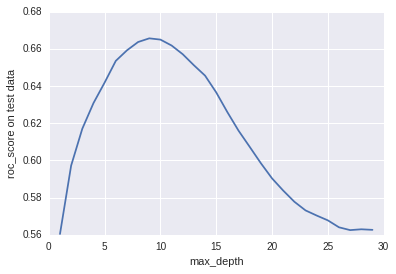

In [76]:
plt.plot(range(1,max_depth), roc_score)
plt.xlabel('max_depth')
plt.ylabel('roc_score on test data')
print('best depth = ', range(1,max_depth)[roc_score.index(max(roc_score))])
print('score = ', max(roc_score))

In [77]:
max_depth = 9

clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train, Y_train)

Y_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(Y_test, Y_proba[:,1])

print('score = ', roc_auc)

score =  0.665540770338


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.234613 to fit



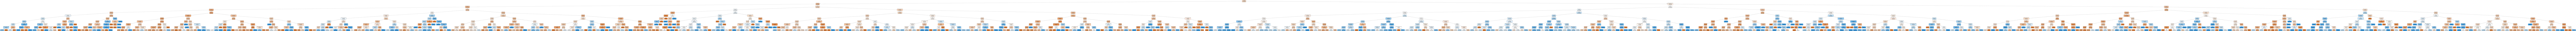

In [189]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=Xcolumns,
                         class_names=['GRANTED', 'NOT GRANTED'],
                         filled=True, rounded=True,  
                         special_characters=True)  

content = dot_data.getvalue()
graph = pydotplus.graph_from_dot_data(content)  
Image(graph.create_png())  

In [78]:
# printing features ordered by importance :
def features_importance(feat_names, feat_importance):
    importance = {feat_names[i]: feat_importance[i] for i in range(len(feat_names))}
    sorted_features = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

    for k,v in sorted_features:
        print('%30a  %5.3f'%(k,v))
        
features_importance(Xcolumns, clf.feature_importances_)
    

                    'pub_year'  0.186
        'TECHNOLOGIE_SECTOR_3'  0.129
              'NB_BACKWARD_XY'  0.110
                  'COUNTRY_82'  0.077
                  'COUNTRY_19'  0.058
                'filing-begin'  0.050
         'oecd_NB_BACKWARD_PL'  0.043
           'NB_BACKWARD_AUTRE'  0.038
            'FISRT_APP_TYPE_1'  0.037
      'LANGUAGE_OF_FILLING_14'  0.025
                  'VOIE_DEPOT'  0.022
                  'COUNTRY_45'  0.020
                  'pub-filing'  0.015
                  'pct_NB_IPC'  0.014
                 'APP_NB_TYPE'  0.012
       'LANGUAGE_OF_FILLING_6'  0.012
               'pct_NB_IPC_LY'  0.011
                      'INV_NB'  0.011
              'NB_BACKWARD_PL'  0.010
               'cited_age_min'  0.010
        'TECHNOLOGIE_SECTOR_0'  0.010
                  'NB_CLASSES'  0.009
        'oecd_NB_ROOT_CLASSES'  0.008
                   'COUNTRY_4'  0.008
        'TECHNOLOGIE_SECTOR_2'  0.007
             'NB_BACKWARD_NPL'  0.007
            

# Training random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
clf = RandomForestClassifier(n_estimators=1400, max_depth=15, n_jobs=5, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=5,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
features_importance(Xcolumns, clf.feature_importances_)

                    'pub_year'  0.090
              'NB_BACKWARD_XY'  0.056
               'pct_NB_IPC_LY'  0.043
                  'pub-filing'  0.040
           'NB_BACKWARD_AUTRE'  0.039
                  'pct_NB_IPC'  0.039
                  'COUNTRY_82'  0.035
        'TECHNOLOGIE_SECTOR_3'  0.034
                'filing-begin'  0.032
         'oecd_NB_BACKWARD_PL'  0.032
        'oecd_NB_ROOT_CLASSES'  0.028
                 'NB_BACKWARD'  0.025
       'LANGUAGE_OF_FILLING_4'  0.023
              'NB_BACKWARD_PL'  0.022
                      'INV_NB'  0.022
               'cited_age_max'  0.021
               'cited_age_min'  0.021
              'cited_age_mean'  0.021
            'cited_age_median'  0.021
                  'NB_CLASSES'  0.021
                  'COUNTRY_19'  0.020
        'TECHNOLOGIE_SECTOR_0'  0.018
       'LANGUAGE_OF_FILLING_6'  0.017
                  'IDX_ORIGIN'  0.017
        'oecd_NB_BACKWARD_NPL'  0.015
               'cited_age_std'  0.015
            

In [81]:
Y_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(Y_test, Y_proba[:,1])

print('score = ', roc_auc)

score =  0.686851542458


# Features analysis

In [37]:
groups_count = df.groupby('pub_year').count().add_suffix('_count').reset_index()
groups_mean = df.groupby('pub_year').mean().add_suffix('_mean').reset_index()

In [39]:
groups_mean.VARIABLE_CIBLE_mean


0     0.666667
1     0.359951
2     0.349825
3     0.339558
4     0.332917
5     0.315317
6     0.303965
7     0.305063
8     0.315633
9     0.341302
10    0.385877
11    0.405322
12    0.424603
13    0.444372
14    0.458941
15    0.462780
16    0.475698
17    0.495595
18    0.490815
19    0.501818
20    0.473742
21    0.463526
22    0.428616
23    0.554795
24    0.735294
Name: VARIABLE_CIBLE_mean, dtype: float64

0 : granted, 1 : not granted ===> Il est de plus en plus difficile d'obtenir le brevet au cours du temps.

In [47]:
groups_mean.iloc[:,:11]

,pub_year,APP_NB_mean,APP_NB_PAYS_mean,APP_NB_TYPE_mean,NB_CLASSES_mean,NB_ROOT_CLASSES_mean,NB_SECTORS_mean,NB_FIELDS_mean,INV_NB_mean,INV_NB_PAYS_mean
0,1988,1.333333,1.000000,0.333333,2.666667,1.333333,1.333333,1.333333,1.333333,1.000000
1,1989,1.087268,1.029172,0.859827,2.026452,1.451174,1.136712,1.309765,2.236836,1.028430
2,1990,1.079095,1.027285,0.867608,2.077291,1.451853,1.132498,1.307570,2.279966,1.036310
3,1991,1.076253,1.022720,0.869904,2.086109,1.461251,1.143687,1.323478,2.291524,1.035585
4,1992,1.078879,1.026154,0.870897,2.150568,1.487965,1.154736,1.339064,2.301240,1.035636
5,1993,1.079991,1.028105,0.868339,2.184737,1.495082,1.162361,1.345044,2.342990,1.042698
6,1994,1.070162,1.022241,0.873858,2.241001,1.497260,1.155582,1.342001,2.377458,1.042441
7,1995,1.085013,1.023759,0.873183,2.233183,1.491729,1.150677,1.334135,2.423158,1.053935
8,1996,1.082661,1.027338,0.887684,2.260402,1.493559,1.145306,1.330275,2.456955,1.053656
9,1997,1.071718,1.024700,0.887879,2.265261,1.501411,1.149435,1.336009,2.454746,1.056193


In [93]:
df_voie = df[df.pub_year == 1989]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bd4c458d0>]], dtype=object)

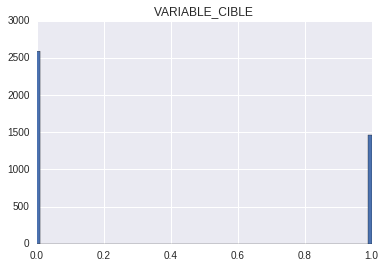

In [94]:
df_voie.hist('VARIABLE_CIBLE', bins=100)

In [107]:
groups_mean = df.groupby('VOIE_DEPOT').mean().add_suffix('_mean').reset_index()
groups_std = df.groupby('VOIE_DEPOT').std().add_suffix('_std').reset_index()
grou

In [111]:
groups_mean

,VOIE_DEPOT,SOURCE_BEGIN_MONTH_mean,APP_NB_mean,APP_NB_PAYS_mean,APP_NB_TYPE_mean,NB_CLASSES_mean,NB_ROOT_CLASSES_mean,NB_SECTORS_mean,NB_FIELDS_mean,INV_NB_mean,...,TECHNOLOGIE_SECTOR_0_mean,TECHNOLOGIE_SECTOR_1_mean,TECHNOLOGIE_SECTOR_2_mean,TECHNOLOGIE_SECTOR_3_mean,TECHNOLOGIE_SECTOR_4_mean,FISRT_INV_TYPE_0_mean,FISRT_INV_TYPE_1_mean,FISRT_INV_TYPE_2_mean,FISRT_INV_TYPE_3_mean,FISRT_INV_TYPE_4_mean
0,0,0.040191,1.090085,1.025677,0.883551,2.538226,1.616403,1.166436,1.392485,2.678740,...,0.226566,0.160418,0.349959,0.205456,0.057601,0.939547,0.055555,0.000552,0.000195,0.004151
1,1,0.121070,1.060747,1.019552,0.893814,2.082135,1.434967,1.140764,1.290587,2.364377,...,0.271007,0.149237,0.209836,0.291837,0.078082,0.894612,0.102556,0.000360,0.000162,0.002309


In [112]:
groups_std

,VOIE_DEPOT,SOURCE_BEGIN_MONTH_std,APP_NB_std,APP_NB_PAYS_std,APP_NB_TYPE_std,NB_CLASSES_std,NB_ROOT_CLASSES_std,NB_SECTORS_std,NB_FIELDS_std,INV_NB_std,...,TECHNOLOGIE_SECTOR_0_std,TECHNOLOGIE_SECTOR_1_std,TECHNOLOGIE_SECTOR_2_std,TECHNOLOGIE_SECTOR_3_std,TECHNOLOGIE_SECTOR_4_std,FISRT_INV_TYPE_0_std,FISRT_INV_TYPE_1_std,FISRT_INV_TYPE_2_std,FISRT_INV_TYPE_3_std,FISRT_INV_TYPE_4_std
0,0,0.196409,0.385359,0.16745,0.351859,2.06424,0.899870,0.408555,0.645914,1.990596,...,0.418611,0.366995,0.476959,0.404036,0.232988,0.238325,0.229061,0.023483,0.013971,0.064292
1,1,0.326210,0.296480,0.16322,0.319728,1.40081,0.720376,0.373488,0.553843,1.684249,...,0.444481,0.356324,0.407193,0.454609,0.268302,0.307053,0.303379,0.018973,0.012743,0.047997


In [114]:
groups_mean.transpose()

,0,1
VOIE_DEPOT,0.000000,1.000000
SOURCE_BEGIN_MONTH_mean,0.040191,0.121070
APP_NB_mean,1.090085,1.060747
APP_NB_PAYS_mean,1.025677,1.019552
APP_NB_TYPE_mean,0.883551,0.893814
NB_CLASSES_mean,2.538226,2.082135
NB_ROOT_CLASSES_mean,1.616403,1.434967
NB_SECTORS_mean,1.166436,1.140764
NB_FIELDS_mean,1.392485,1.290587
INV_NB_mean,2.678740,2.364377
